In [5]:
from argparse import Namespace
import torch

args = Namespace(
    activation='ReLU',
    adding_bond_types=True,
    adding_h=True,
    aggregation='mean',
    aggregation_norm=100,
    atom_constraints=[False],
    atom_descriptor_scaling=True,
    atom_descriptors=None,
    atom_descriptors_path=None,
    atom_descriptors_size=0,
    atom_features_size=0,
    atom_messages=False,
    atom_targets=['CDD'],
    batch_size=50,
    bias=False,
    bias_solvent=False,
    bond_constraints=[],
    bond_descriptor_scaling=True,
    bond_descriptors=None,
    bond_descriptors_path=None,
    bond_descriptors_size=0,
    bond_features_size=0,
    bond_targets=[],
    cache_cutoff=10000,
    checkpoint_dir=None,
    checkpoint_frzn=None,
    checkpoint_path=None,
    checkpoint_paths=None,
    class_balance=False,
    config_path=None,
    constraints_path=None,
    crossval_index_dir=None,
    crossval_index_file=None,
    crossval_index_sets=None,
    cuda=True,
    data_path='demo.csv',
    data_weights_path=None,
    dataset_type='regression',
    depth=3,
    depth_solvent=3,
    device=torch.device('cuda'),
    dropout=0.0,
    empty_cache=False,
    ensemble_size=1,
    epochs=100,
    evidential_regularization=0,
    explicit_h=False,
    extra_metrics=[],
    features_generator=None,
    features_only=False,
    features_path=None,
    features_scaling=True,
    features_size=None,
    ffn_hidden_size=300,
    ffn_num_layers=2,
    final_lr=0.0001,
    folds_file=None,
    freeze_first_only=False,
    frzn_ffn_layers=0,
    gpu=None,
    grad_clip=None,
    hidden_size=300,
    hidden_size_solvent=300,
    ignore_columns=None,
    ignore_nan_metrics=False,
    init_lr=0.0001,
    is_atom_bond_targets=True,
    keeping_atom_map=False,
    log_frequency=10,
    loss_function='mse',
    max_data_size=None,
    max_lr=0.001,
    metric='rmse',
    metrics=['rmse'],
    minimize_score=True,
    molecule_targets=[],
    mpn_shared=False,
    multiclass_num_classes=3,
    no_adding_bond_types=False,
    no_atom_descriptor_scaling=False,
    no_bond_descriptor_scaling=False,
    no_cache_mol=False,
    no_cuda=False,
    no_features_scaling=False,
    no_shared_atom_bond_ffn=False,
    num_folds=5,
    num_lrs=1,
    num_tasks=1,
    num_workers=8,
    number_of_molecules=1,
    overwrite_default_atom_features=False,
    overwrite_default_bond_features=False,
    phase_features_path=None,
    pytorch_seed=0,
    quiet=False,
    reaction=False,
    reaction_mode='reac_diff',
    reaction_solvent=False,
    resume_experiment=False,
    save_dir='test_checkpoints_reg',
    save_preds=False,
    save_smiles_splits=True,
    seed=0,
    separate_test_atom_descriptors_path=None,
    separate_test_bond_descriptors_path=None,
    separate_test_constraints_path=None,
    separate_test_features_path=None,
    separate_test_path=None,
    separate_test_phase_features_path=None,
    separate_val_atom_descriptors_path=None,
    separate_val_bond_descriptors_path=None,
    separate_val_constraints_path=None,
    separate_val_features_path=None,
    separate_val_path=None,
    separate_val_phase_features_path=None,
    shared_atom_bond_ffn=True,
    show_individual_scores=True,
    smiles_columns=['smiles'],
    spectra_activation='exp',
    spectra_phase_mask_path=None,
    spectra_target_floor=1e-08,
    split_key_molecule=0,
    split_sizes=[0.8, 0.1, 0.1],
    split_type='scaffold_balanced',
    target_columns=['CDD'],
    target_weights=None,
    task_names=['CDD'],
    test=False,
    test_fold_index=None,
    train_data_size=None,
    undirected=False,
    use_input_features=False,
    val_fold_index=None,
    warmup_epochs=2.0,
    weights_ffn_num_layers=2
)


In [6]:
import chemprop

arguments = [
    '--data_path', '../data/QM_100.csv',
    '--dataset_type', 'regression',
    '--save_dir', 'test',
    '--smiles_columns', 'smiles',
    '--target_columns', 'CDD',
    '--is_atom_bond_targets',
    '--epochs', '100',
    '--save_smiles_splits',
    '--adding_h',
    '--show_individual_scores',
    '--split_type', 'scaffold_balanced',
    '--num_folds', '5',
    '--metric', 'rmse',
    '--num_workers','10',
    '--test'


]

args = chemprop.args.TrainArgs().parse_args(arguments)
mean_score, std_score = chemprop.train.cross_validate(args=args, train_func=chemprop.train.run_training)


Command line
python /opt/anaconda3/envs/chemprop/lib/python3.8/site-packages/ipykernel_launcher.py --f=/home/nikolenko/.local/share/jupyter/runtime/kernel-v2-23932063gSwtZ9lBgKA.json
Args
{'activation': 'ReLU',
 'adding_bond_types': True,
 'adding_h': True,
 'aggregation': 'mean',
 'aggregation_norm': 100,
 'atom_constraints': [False],
 'atom_descriptor_scaling': True,
 'atom_descriptors': None,
 'atom_descriptors_path': None,
 'atom_descriptors_size': 0,
 'atom_features_size': 0,
 'atom_messages': False,
 'atom_targets': ['CDD'],
 'batch_size': 50,
 'bias': False,
 'bias_solvent': False,
 'bond_constraints': [],
 'bond_descriptor_scaling': True,
 'bond_descriptors': None,
 'bond_descriptors_path': None,
 'bond_descriptors_size': 0,
 'bond_features_size': 0,
 'bond_targets': [],
 'cache_cutoff': 10000,
 'checkpoint_dir': None,
 'checkpoint_frzn': None,
 'checkpoint_path': None,
 'checkpoint_paths': None,
 'class_balance': False,
 'config_path': None,
 'constraints_path': None,
 'crossv

In [1]:
from chemprop.features import BatchMolGraph, get_atom_fdim, get_bond_fdim, mol2graph

import pandas as pd
data = pd.read_csv('../data/QM_100.csv')
batch = data.smiles

mol_graph = mol2graph(batch)
f_atoms, f_bonds, a2b, b2a, b2revb, a_scope, b_scope = mol_graph.get_components()


print("Shape of f_atoms:", f_atoms.shape)
print("Shape of f_bonds:", f_bonds.shape)
print("Shape of a2b:", a2b.shape)
print("Shape of b2a:", b2a.shape)
print("Shape of b2revb:", b2revb.shape)
print("Shape of a_scope:", a_scope)
print("Shape of b_scope:", b_scope)


mols = mol_graph.get_mols()

Shape of f_atoms: torch.Size([1715, 133])
Shape of f_bonds: torch.Size([3589, 147])
Shape of a2b: torch.Size([1715, 4])
Shape of b2a: torch.Size([3589])
Shape of b2revb: torch.Size([3589])
Shape of a_scope: [(1, 18), (19, 20), (39, 12), (51, 9), (60, 20), (80, 21), (101, 21), (122, 21), (143, 19), (162, 15), (177, 15), (192, 30), (222, 25), (247, 13), (260, 15), (275, 18), (293, 14), (307, 19), (326, 23), (349, 10), (359, 16), (375, 14), (389, 20), (409, 11), (420, 17), (437, 4), (441, 13), (454, 20), (474, 12), (486, 12), (498, 20), (518, 18), (536, 19), (555, 15), (570, 9), (579, 14), (593, 26), (619, 14), (633, 9), (642, 15), (657, 8), (665, 16), (681, 12), (693, 18), (711, 23), (734, 25), (759, 18), (777, 22), (799, 12), (811, 18), (829, 18), (847, 21), (868, 21), (889, 19), (908, 10), (918, 14), (932, 14), (946, 9), (955, 11), (966, 17), (983, 22), (1005, 15), (1020, 18), (1038, 13), (1051, 21), (1072, 25), (1097, 11), (1108, 13), (1121, 9), (1130, 18), (1148, 20), (1168, 16), (11

In [2]:

adjacency_matrices = mol_graph.get_adjacency_matrix()

print(adjacency_matrices[1].shape)

torch.Size([36, 36])


In [3]:
display(adjacency_matrices)

[tensor([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 1., 0., 0., 0., 0.

/opt/anaconda3/envs/chemprop/lib/python3.8/site-packages/rdkit/Chem/Draw/IPythonConsole.py:261: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


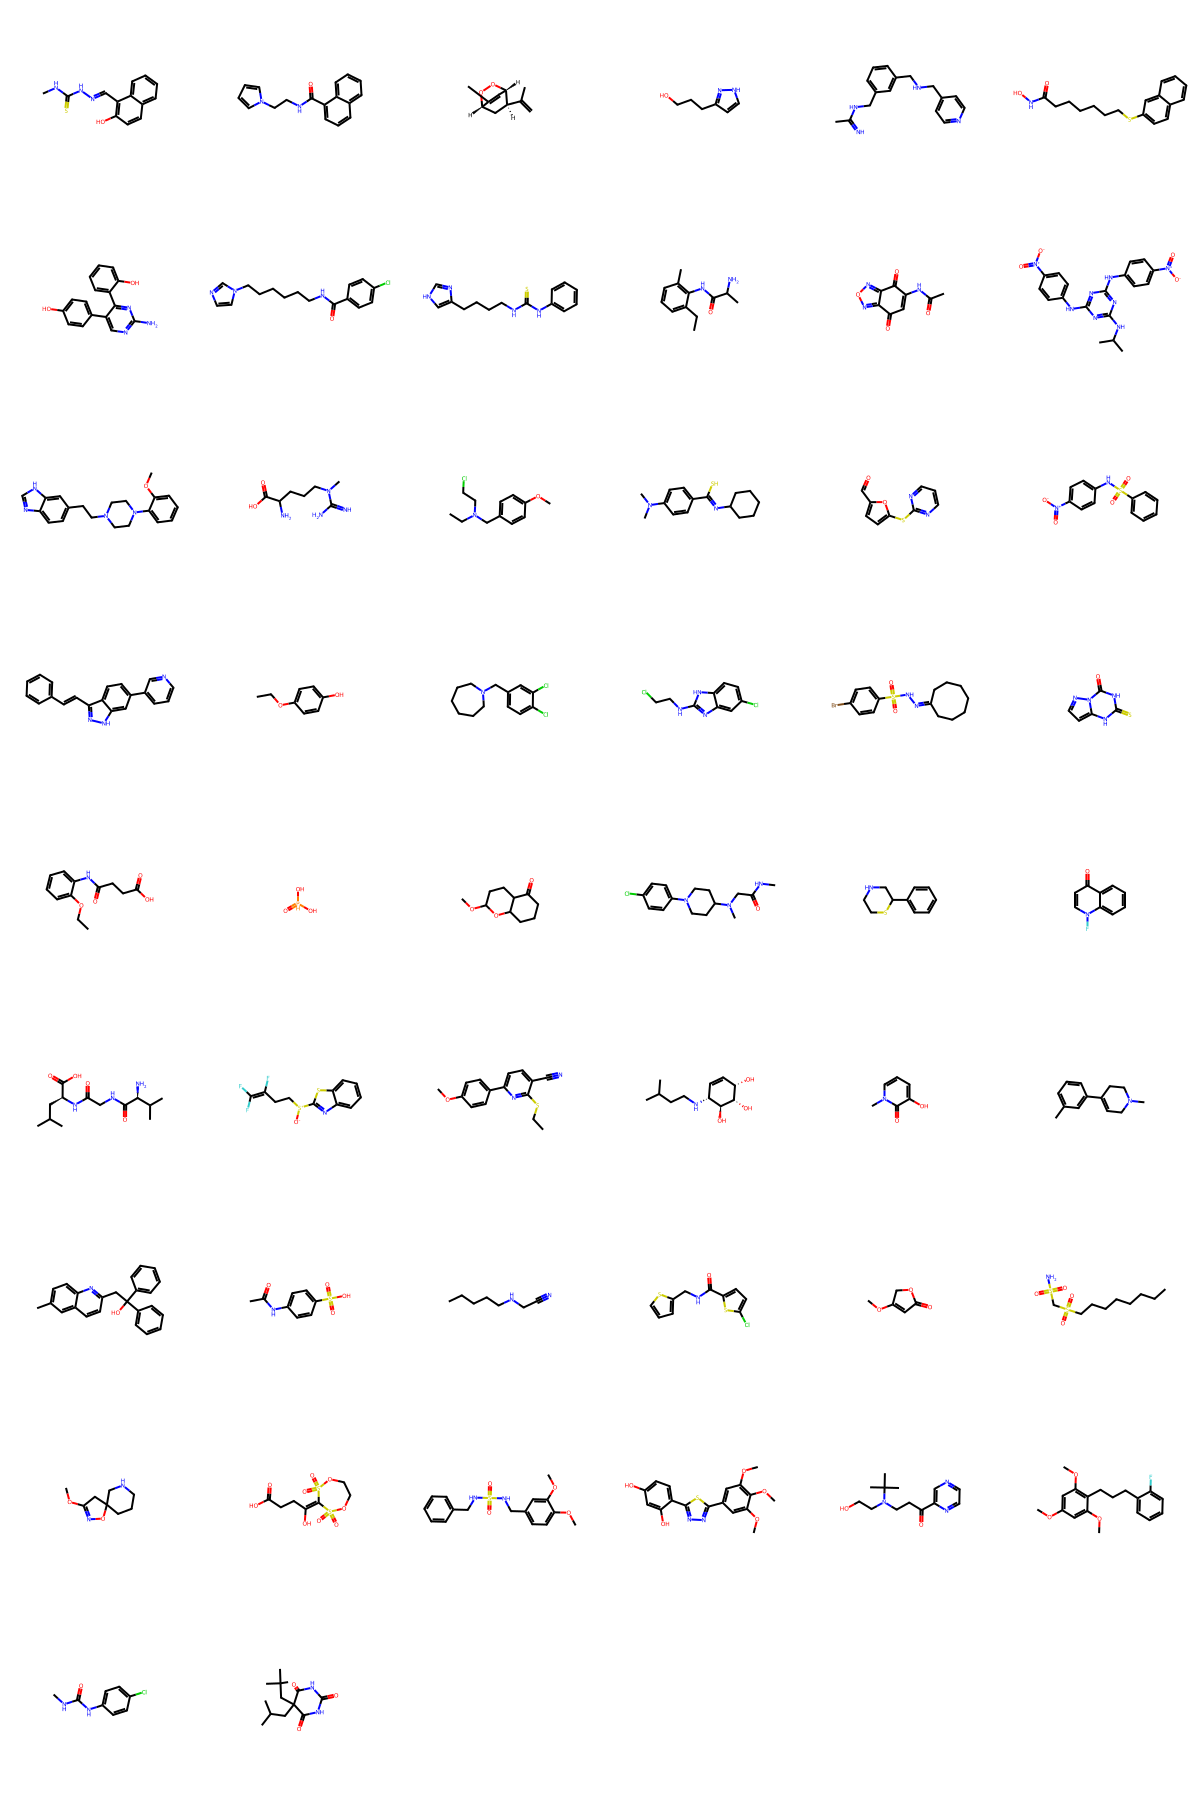

In [4]:
from rdkit import Chem
from rdkit.Chem import Draw

img = Draw.MolsToGridImage(mols, molsPerRow=6, subImgSize=(200, 200), useSVG=True)
display(img)

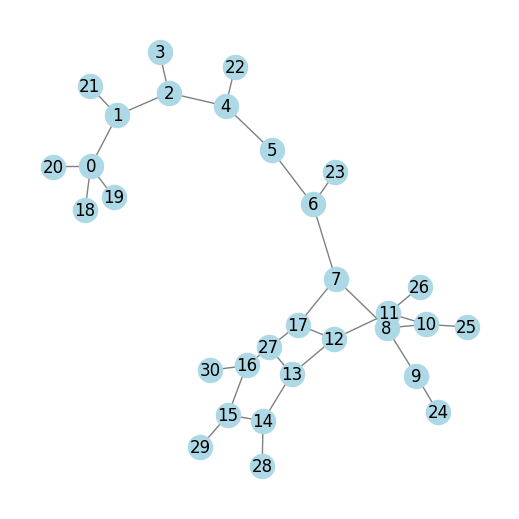

In [6]:
import torch
import networkx as nx
import matplotlib.pyplot as plt

def adjacency_matrix_to_networkx(adjacency_matrix: torch.Tensor) -> nx.Graph:
    G = nx.Graph()
    num_nodes = adjacency_matrix.size(0)
    G.add_nodes_from(range(num_nodes))
    for i in range(num_nodes):
        for j in range(num_nodes):
            if adjacency_matrix[i, j].item() == 1:
                G.add_edge(i, j)
    return G

def visualize_graph(G):

    plt.figure(figsize=(5, 5))
    nx.draw(G, pos=nx.spring_layout(G, seed=42), with_labels=True, node_color='lightblue', edge_color='gray')
    plt.show()

G = adjacency_matrix_to_networkx(adjacency_matrices[0])

visualize_graph(G)

In [ ]:

class MPN(nn.Module):
    """A message passing neural network for encoding a molecule."""

    def __init__(self,
                 args: Namespace,
                 atom_fdim: int = None,
                 bond_fdim: int = None,
                 graph_input: bool = False):
        """
        Initializes the MPN.

        :param args: Arguments.
        :param atom_fdim: Atom features dimension.
        :param bond_fdim: Bond features dimension.
        :param graph_input: If true, expects BatchMolGraph as input. Otherwise expects a list of smiles strings as input.
        """
        super(MPN, self).__init__()
        self.args = args
        self.atom_fdim = atom_fdim or get_atom_fdim(args)
        self.bond_fdim = bond_fdim or get_bond_fdim(args) + (not args.atom_messages) * self.atom_fdim
        self.graph_input = graph_input
        self.encoder = MPNEncoder(self.args, self.atom_fdim, self.bond_fdim)

    def forward(self,
                batch: Union[List[str], BatchMolGraph],
                features_batch: List[np.ndarray] = None) -> torch.FloatTensor:
        """
        Encodes a batch of molecular SMILES strings.

        :param batch: A list of SMILES strings or a BatchMolGraph (if self.graph_input is True).
        :param features_batch: A list of ndarrays containing additional features.
        :return: A PyTorch tensor of shape (num_molecules, hidden_size) containing the encoding of each molecule.
        """
        if not self.graph_input:  # if features only, batch won't even be used
            batch = mol2graph(batch, self.args)

        output = self.encoder.forward(batch, features_batch)

        return output

In [ ]:
import torch
from torch.nn import Linear
import torch.nn.functional as F 
from torch_geometric.nn import GCNConv, TopKPooling, global_mean_pool
from torch_geometric.nn import global_mean_pool as gap, global_max_pool as gmp
embedding_size = 64

class GCN(torch.nn.Module):
    def __init__(self):
        # Init parent
        super(GCN, self).__init__()
        torch.manual_seed(42)

        # GCN layers
        self.initial_conv = GCNConv(data.num_features, embedding_size)
        self.conv1 = GCNConv(embedding_size, embedding_size)
        self.conv2 = GCNConv(embedding_size, embedding_size)
        self.conv3 = GCNConv(embedding_size, embedding_size)

        # Output layer
        self.out = Linear(embedding_size*2, 1)

    def forward(self, x, edge_index, batch_index):
        # First Conv layer
        hidden = self.initial_conv(x, edge_index)
        hidden = F.tanh(hidden)

        # Other Conv layers
        hidden = self.conv1(hidden, edge_index)
        hidden = F.tanh(hidden)
        hidden = self.conv2(hidden, edge_index)
        hidden = F.tanh(hidden)
        hidden = self.conv3(hidden, edge_index)
        hidden = F.tanh(hidden)
          
        # Global Pooling (stack different aggregations)
        hidden = torch.cat([gmp(hidden, batch_index), 
                            gap(hidden, batch_index)], dim=1)

        # Apply a final (linear) classifier.
        out = self.out(hidden)

        return out, hidden

model = GCN()
print(model)
print("Number of parameters: ", sum(p.numel() for p in model.parameters()))

In [ ]:
from torch_geometric.data import DataLoader
import warnings
warnings.filterwarnings("ignore")

loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0007)  

# Use GPU for training
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

data_size = len(data)
NUM_GRAPHS_PER_BATCH = 64
loader = DataLoader(data[:int(data_size * 0.8)], 
                    batch_size=NUM_GRAPHS_PER_BATCH, shuffle=True)
test_loader = DataLoader(data[int(data_size * 0.8):], 
                         batch_size=NUM_GRAPHS_PER_BATCH, shuffle=True)

def train(data):
    # Enumerate over the data
    for batch in loader:
      # Use GPU
      batch.to(device)  
      # Reset gradients
      optimizer.zero_grad() 
      # Passing the node features and the connection info
      pred, embedding = model(batch.x.float(), batch.edge_index, batch.batch) 
      # Calculating the loss and gradients
      loss = loss_fn(pred, batch.y)     
      loss.backward()  
      # Update using the gradients
      optimizer.step()   
    return loss, embedding

print("Starting training...")
losses = []
for epoch in range(2000):
    loss, h = train(data)
    losses.append(loss)
    if epoch % 100 == 0:
      print(f"Epoch {epoch} | Train Loss {loss}")